# Tesla Sales Analysis 

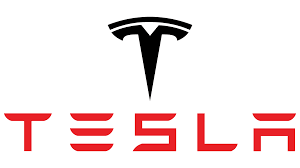
    

Tesla, the renowned electric vehicle manufacturer, has captured the world's attention with its groundbreaking innovations and exponential growth. 

The file TSLA Testing.csv consists of Tesla's sales from 22/6/2022 to 21/6/2022 during its testing phase. The columns represents the following data:

Date: The date.

Open: Tesla stock opening price for the given date.

High: Tesla stock price at its highest point.

Low: Tesla stock price at its lowest.

Close: Tesla stock closing price.

Adj. Close: Tesla stock closing price adjusted after taking dividends, stock splits and new stock offerings into account.

Volume: Amount of an Tesla stock that changed hands over the course of the trading day.

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
%matplotlib inline

In [123]:
TESLA = pd.read_csv("TSLA Testing.csv")
TESLA

,Date,Open,High,Low,Close,Adj Close,Volume,MonthID,Month
0,6/22/2022,234.503326,246.833328,233.826660,236.086670,236.086670,101107500,6,June
1,6/23/2022,237.906662,239.316666,228.636673,235.070007,235.070007,104202600,6,June
2,6/24/2022,237.470001,246.066666,236.086670,245.706665,245.706665,95770800,6,June
3,6/27/2022,249.366669,252.070007,242.566666,244.919998,244.919998,89178300,6,June
4,6/28/2022,244.483337,249.970001,232.343338,232.663330,232.663330,90391200,6,June
...,...,...,...,...,...,...,...,...,...
246,6/14/2023,260.170013,261.570007,250.500000,256.790009,256.790009,170575500,6,June
247,6/15/2023,248.399994,258.950012,247.289993,255.899994,255.899994,160171200,6,June
248,6/16/2023,258.920013,263.600006,257.209991,260.540009,260.540009,167563700,6,June
249,6/20/2023,261.500000,274.750000,261.119995,274.450012,274.450012,165611200,6,June


In [124]:
x = TESLA.isnull().sum()
y = TESLA.isnull().sum().sum()
print("The NaN values are as shown: ",x)
print("The number of NaN values are: ", y)

The NaN values are as shown:  Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
 MonthID     0
Month        0
dtype: int64
The number of NaN values are:  0


# Description Of The Data

In [50]:
TESLA.describe()

,Open,High,Low,Close,Adj Close,Volume,MonthID
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,210.688220,215.466162,205.595405,210.655936,210.655936,1.208421e+08,6.553785
std,51.496805,52.164593,50.789028,51.421134,51.421134,4.971209e+07,3.435127
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07,1.000000
25%,176.635002,182.419998,172.504998,178.474998,178.474998,8.141040e+07,4.000000
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.102522e+08,7.000000
75%,247.361671,251.520004,241.084999,245.224998,245.224998,1.569024e+08,9.500000
max,311.666656,314.666656,305.579987,309.320007,309.320007,3.065906e+08,12.000000


251 valid observations have been recorded in this dataset.

From the standard deviation of the stock prices, it is shown that the prices are spread out widely, away from the mean stock prices.

The minimum open stock price is 103 dollars while the maximum is approximately 312 dollars.

The minimum high stock price is approximately 112 dollars while the maximum is approximately 315 dollars.

The minimum low stock price is approximately 109 dollars while the maximum is approximately 306 dollars.

The minimum close stock price is around 108 dollars while the maximum is around 309 dollars. The same goes for the adjacent close stock price.

The lowest stock volume is 40 million whereas the highest stock volume is 300 million.

# (i) Correlation

In [29]:
TESLA.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_15644\2826775741.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  TESLA.corr()


,Open,High,Low,Close,Adj Close,Volume,MonthID
Open,1.000000,0.997077,0.996870,0.991861,0.991861,-0.605982,0.325445
High,0.997077,1.000000,0.997619,0.996567,0.996567,-0.590276,0.319448
Low,0.996870,0.997619,1.000000,0.997176,0.997176,-0.609373,0.313058
Close,0.991861,0.996567,0.997176,1.000000,1.000000,-0.596444,0.304664
Adj Close,0.991861,0.996567,0.997176,1.000000,1.000000,-0.596444,0.304664
Volume,-0.605982,-0.590276,-0.609373,-0.596444,-0.596444,1.000000,-0.593673
MonthID,0.325445,0.319448,0.313058,0.304664,0.304664,-0.593673,1.000000


From the data above, the following has been noticed:

1. There is a positive relationship between the open stock prices and other stock prices such as high, low, close and adjacent close prices.


2. There is a negative relationship between the volume of stock and all of the stock prices.

# (ii) Open Stock Prices

In [31]:
TESLA.groupby("Month")["Open"].sum()

Month
April        3376.950025
August       6836.129972
December     3273.839994
February     3765.389985
January      2646.319993
July         4977.733367
June         5012.280012
March        4333.780015
May          3845.009995
November     4063.060029
October      4706.649993
September    6045.599915
Name: Open, dtype: float64

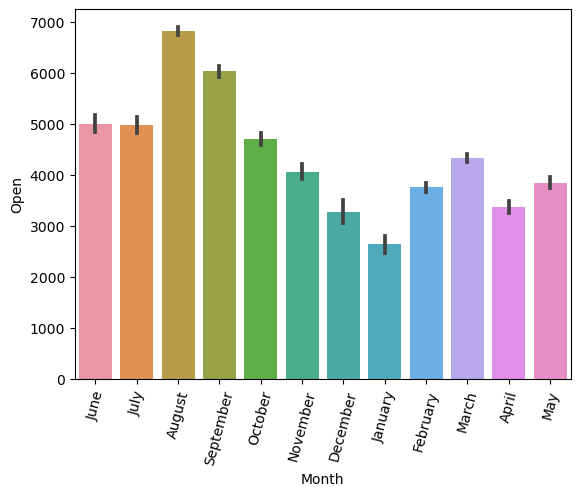

In [84]:
sb.barplot(x = 'Month', y = 'Open', estimator = sum, data = TESLA)
plt.xticks(rotation = 75)
plt.show()

January has the lowest open stock prices while August has the highest open stock prices.

June and July has the same stock prices but slightly similar. The same goes for November and March, December and April, and February and May.

The open stock prices decreases from August to January and increases from April to August.

# (iii) Close Stock Prices

In [34]:
TESLA.groupby("Month")["Close"].sum()

Month
April        3362.149978
August       6782.006712
December     3212.380003
February     3795.730011
January      2683.919982
July         5027.893324
June         5027.330017
March        4336.020006
May          3867.579972
November     4016.179992
October      4700.020016
September    6063.430022
Name: Close, dtype: float64

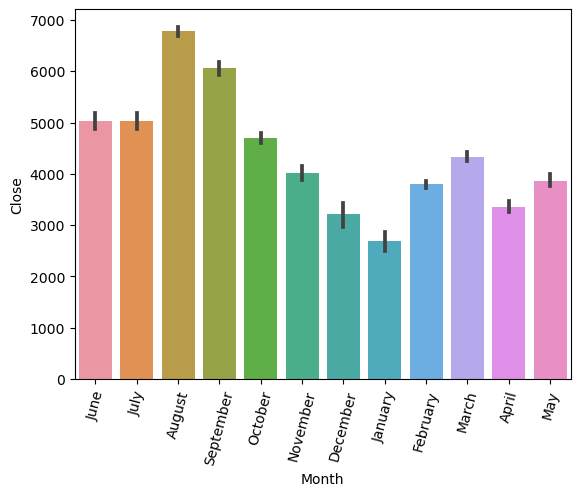

In [85]:
sb.barplot(x = 'Month', y = 'Close', estimator = sum, data = TESLA)
plt.xticks(rotation = 75)
plt.show()

January has the lowest close stock prices while August has the highest close stock prices.

June and July has the same stock prices but slightly similar. The same goes for November and March, December and April, and February and May.

The close stock prices decreases from August to January and increases from April to August.

# (iv) Adjacent Close Stock Prices

In [33]:
TESLA.groupby("Month")["Adj Close"].sum()

Month
April        3362.149978
August       6782.006712
December     3212.380003
February     3795.730011
January      2683.919982
July         5027.893324
June         5027.330017
March        4336.020006
May          3867.579972
November     4016.179992
October      4700.020016
September    6063.430022
Name: Adj Close, dtype: float64

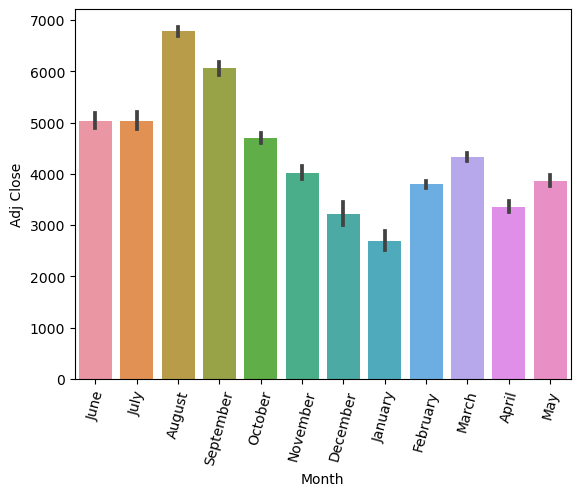

In [86]:
sb.barplot(x = 'Month', y = 'Adj Close', estimator = sum, data = TESLA)
plt.xticks(rotation = 75)
plt.show()

January has the lowest adjacent close stock prices while August has the highest adjacent close stock prices.

June and July has the same stock prices but slightly similar. The same goes for November and March, December and April, and February and May.

The adjacent close stock prices decreases from August to January and increases from April to August.

# (v) Stock Volume

In [14]:
TESLA.groupby("Month")["Volume"].sum()

Month
April        2505176300
August       1695263200
December     2944247700
February     3624845100
January      3897499400
July         1744884000
June         3006025800
March        3311619900
May          2681994800
November     1885275300
October      1735263100
September    1299271000
Name: Volume, dtype: int64

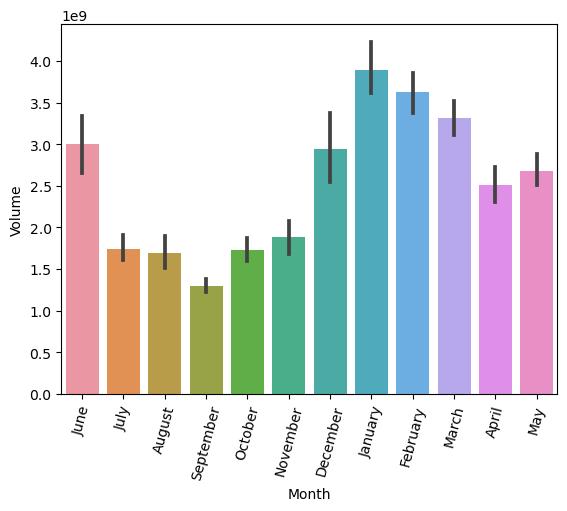

In [87]:
sb.barplot(x = 'Month', y = 'Volume', estimator = sum, data = TESLA)
plt.xticks(rotation = 75)
plt.show()

September has the lowest stock volume while January has the highest stock volume.

June and July has the same stock prices but slightly similar. The same goes for November and March, December and April, and February and May.

The stock volume decreases from January to April, then from May to September and increases from September to January.

# (vi) High Stock Prices

In [15]:
TESLA.groupby("Month")["High"].sum()

Month
April        3428.999998
August       6942.596647
December     3337.349983
February     3880.460006
January      2744.859985
July         5116.833329
June         5130.126678
March        4426.639984
May          3929.610016
November     4144.399993
October      4825.560044
September    6174.569945
Name: High, dtype: float64

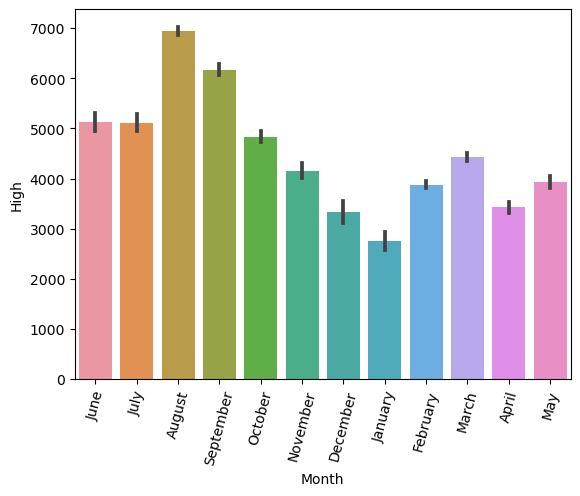

In [88]:
sb.barplot(x = 'Month', y = 'High', estimator = sum, data = TESLA)
plt.xticks(rotation = 75)
plt.show()

January has the lowest high stock prices while August has the highest high stock prices. 

June and July has the same stock prices but slightly similar. The same goes for November and March, December and April, and February and May.

The high stock prices decreases from August to January and increases from April to August.

# (vii) Low Stock Prices

In [35]:
TESLA.groupby("Month")["Low"].sum()

Month
April        3297.029999
August       6675.486664
December     3153.390016
February     3673.309998
January      2568.610001
July         4875.093323
June         4908.826629
March        4237.579986
May          3783.479968
November     3925.220001
October      4567.120011
September    5939.299989
Name: Low, dtype: float64

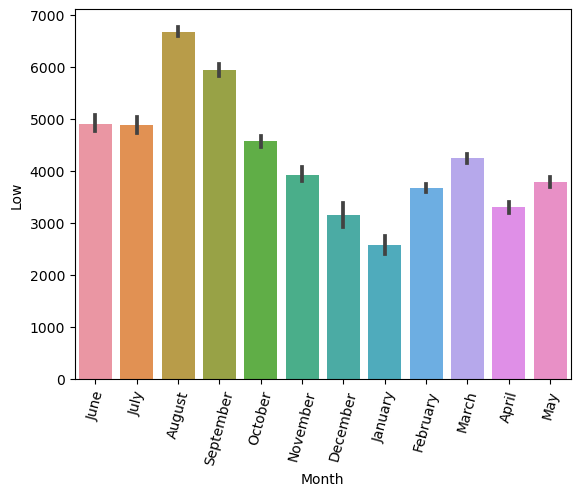

In [89]:
sb.barplot(x = 'Month', y = 'Low', estimator = sum, data = TESLA)
plt.xticks(rotation = 75)
plt.show()

January has the lowest low stock prices while August has the highest low stock prices.

June and July has the same stock prices but slightly similar. The same goes for November and March, December and April, and February and May.

The low stock prices decreases from August to January and increases from April to August.

# Conclusion

There will be increased chances of risks during investing if the prices continue to move away from the mean price. New ways should be put through would bring the stock prices towards the mean stock price resulting to a low standard deviation, hence decreasing the chances of risks.

It is noticed that January has significantly low stock prices but has the highest stock volume. Furthermore, September has the highest stock prices but the lowest stock volume.

Logically, when more money is moving a stock price, it means there is more demand for that stock. If a small amount of money is moving the stock price, the stock will have less demand. But with this trend, it will not attract more investors since it creates a scenario that there is a lack of interest. Consequently, they will see that there is no need to buy that particular stock.

People and investors should be encouraged to buy more stocks during the months of high stock volume and sell more stocks during the months of low stock volume so as to increase interest.
